In [29]:
import os 
import sys
import scipy
import numpy as np
import helpers as h
import utils as u
from glob import glob
from scipy.io import loadmat
from scipy.sparse.linalg import eigsh
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



In [7]:
data_root = "/Users/duuta/ppp/data/stringer/live_data/"
data_files = [fname.split("/")[-1] for fname in glob(f"{data_root}natimg2800_M*.mat")]


In [22]:
d0 = loadmat("/Users/duuta/ppp/data/stringer/live_data/natimg2800_M170714_MP032_2017-09-14.mat", simplify_cells=True)

In [23]:
r0 = d0['stim']['resp']
s0 = d0['stim']['spont']
s1 = d0['stim']['istim']


In [26]:
nimg = (s1 - 1).max()

In [27]:
r0 = r0[s1 < nimg, :]
s1 = s1[s1< nimg]

In [31]:
# subtract spont (32D)
mu = s1.mean(axis=0)
sd = s1.std(axis=0) + 1e-6
r0 = (r0 - mu) / sd
s0 = (s0 - mu) / sd

sv, u = eigsh(s0.T  @ s0, k=32)
r0 = r0 - (r0 @ u) @ u.T

r0 -=r0.mean(axis=0)

0.3333333333333333

In [10]:
def clean_unpack(data0):
    """returns clean and zscored signal"""
    resp0, spon0, istim0 = h.unbox(data0)

    resp0 = h.denoise_resp(resp0, spon0)

    resp0 = h.dupSignal(resp0, istim0)

    return resp0


In [7]:
def compute_cvPCA(resp0):
    ss0 = u.shuff_cvPCA(resp0, nshuff=10)
    ss0 = ss0.mean(axis=0)
    ss0 = ss0 / ss0.sum()

    return ss0


In [11]:
data = loadmat( os.path.join(data_root, data_files[4]), simplify_cells=True)
resp = clean_unpack(data)


In [12]:
resp.shape

(2, 2800, 9476)

In [6]:
x, y, z = data['med'].T

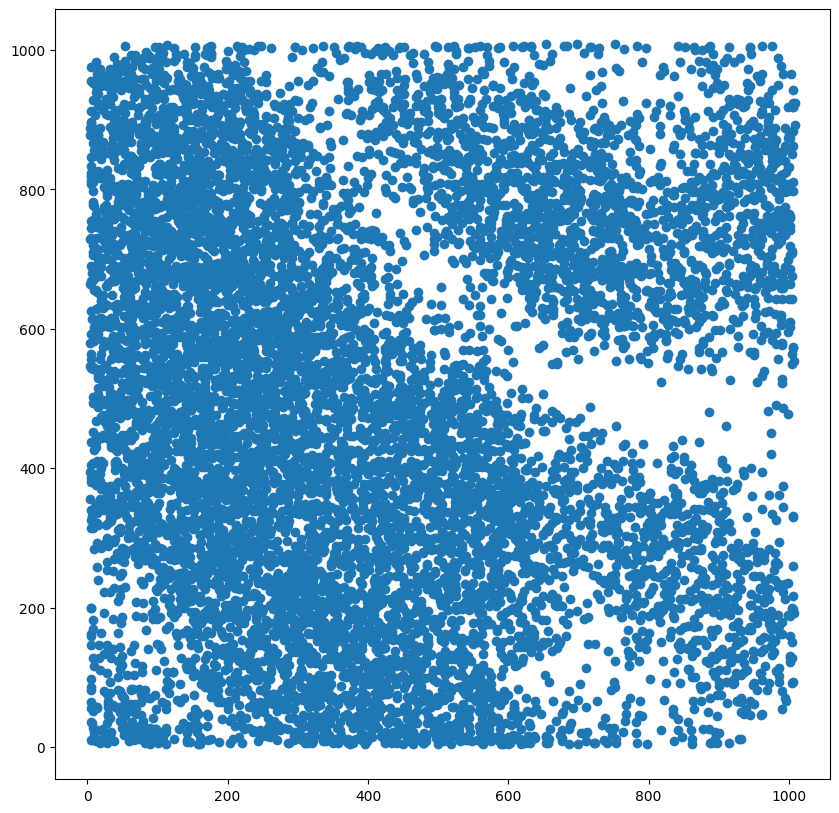

In [10]:
plt.scatter(x, y)

In [11]:
# make the five partitions
# [[0, 200], [200, 400], [400, 600], [600, 800], [800, 1000]]

In [14]:
inx0 = np.where((x < 200) & (y < 400))
inx1 = np.where((x> 200) & (x < 400) & (y < 400))
inx2 = np.where((x> 400) & (x < 600) & (y < 400))
inx3 = np.where((x> 600) & (x < 800) & (y < 400))
inx4 = np.where((x> 800) & (x < 1000) & (y < 400))

In [20]:
arr_inx0 = resp[:, :, inx0].squeeze(axis=2)
arr_inx1 = resp[:, :, inx1].squeeze(axis=2)
arr_inx2 = resp[:, :, inx2].squeeze(axis=2)
arr_inx3 = resp[:, :, inx3].squeeze(axis=2)
arr_inx4 = resp[:, :, inx4].squeeze(axis=2)

In [23]:
ss0 = compute_cvPCA(arr_inx0)

ValueError: n_components=1024 must be between 0 and min(n_samples, n_features)=851 with svd_solver='full'

In [22]:
# drop n_components or increase the girdsize

(2, 2800, 469)

In [ ]:
def get_neurons(x_neurons, y_neurons, nx, ny):
    
    return neurons_of_dims

In [25]:
100 + 193+ 50 + 40

383

In [26]:
929 - 849

80

In [27]:
6^3

5

In [28]:
6**3

216

In [33]:
dir('122')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [35]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

TypeError: list() takes no keyword arguments